# Biodiversity in National Parks

For this project, I will interpret data from the National Parks Service about endangered species in different parks.

I will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After I perform my analysis, I will share my findings about the National Park Service including:

* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?


## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")
print(species_info.head())
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [2]:
df = pd.merge(observations, species_info, how = 'left', on='scientific_name')
print(df.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


## Explore and Explain the Data

### What is the distribution of conservation_status for animals?

In [22]:
print(species_info.groupby('category').size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


There are 5633 species that are not of concern.
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


<Axes: xlabel='conservation_status'>

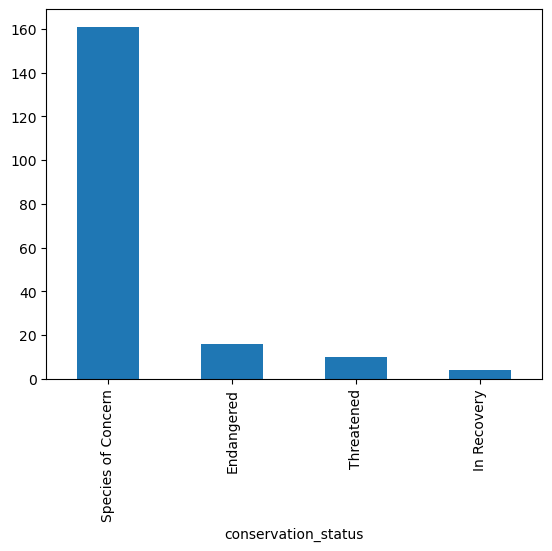

In [3]:
conservation_counts = species_info.conservation_status.value_counts()
print('There are ' + str(species_info.conservation_status.isnull().sum()) + " species that are not of concern.")
print(conservation_counts)
conservation_counts.plot(kind='bar')

### Are certain types of species more likely to be endangered?

category
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


<Axes: xlabel='category'>

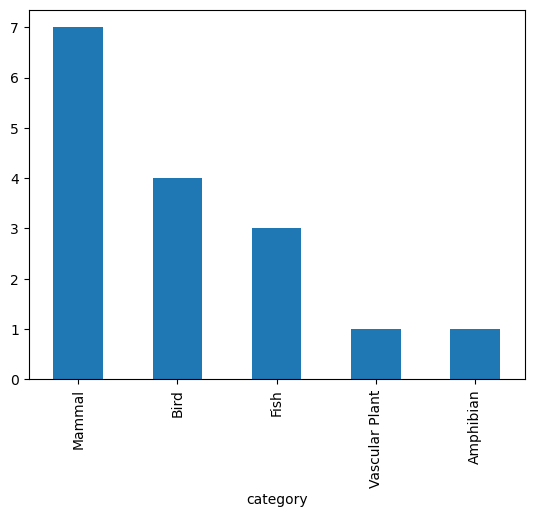

In [4]:
species_info_endangered = species_info[species_info['conservation_status'] == 'Endangered']
category_endangered_count = species_info_endangered.category.value_counts()
print(category_endangered_count)
category_endangered_count.plot(kind='bar')

### Are the differences between species and their conservation status significant?

In [5]:
from scipy.stats import chi2_contingency

species_info.conservation_status.fillna('No Status', inplace=True)
species_info['is_protected'] = species_info.apply(lambda row: 'no' if row.conservation_status == 'No Status' else 'yes', axis=1)

C:\Users\lawre\AppData\Local\Temp\ipykernel_1648\3705836565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species_info.conservation_status.fillna('No Status', inplace=True)


In [31]:
category_is_protected = species_info[['category', 'is_protected']]
category_protected_counts = category_is_protected.groupby(['category','is_protected']).size().unstack().reset_index()
print(category_protected_counts)

is_protected           category    no  yes
0                     Amphibian    73    7
1                          Bird   442   79
2                          Fish   116   11
3                        Mammal   176   38
4             Nonvascular Plant   328    5
5                       Reptile    74    5
6                Vascular Plant  4424   46


In [56]:
for i in range(len(category_protected_counts)):
    for j in range(len(category_protected_counts)):
        if i == j:
            continue
        else:
            contingency1 = category_protected_counts.loc[[i,j],['no','yes']]
            res = chi2_contingency(contingency1)
            if res.pvalue <= 0.05:
                print("The conservation status relationship between " + category_protected_counts.category[i] + " and " + category_protected_counts.category[j] + " is significant with a p value of " + str(round(res.pvalue, 2)))
            else:
                print("The conservation status relationship between " + category_protected_counts.category[i] + " and " + category_protected_counts.category[j] + " is not significant with a p value of " + str(round(res.pvalue, 2)))

The conservation status relationship between Amphibian and Bird is not significant with a p value of 0.18
The conservation status relationship between Amphibian and Fish is not significant with a p value of 1.0
The conservation status relationship between Amphibian and Mammal is not significant with a p value of 0.08
The conservation status relationship between Amphibian and Nonvascular Plant is significant with a p value of 0.0
The conservation status relationship between Amphibian and Reptile is not significant with a p value of 0.78
The conservation status relationship between Amphibian and Vascular Plant is significant with a p value of 0.0
The conservation status relationship between Bird and Amphibian is not significant with a p value of 0.18
The conservation status relationship between Bird and Fish is not significant with a p value of 0.08
The conservation status relationship between Bird and Mammal is not significant with a p value of 0.45
The conservation status relationship 

### Which species were spotted the most at each park?

In [71]:
park_common_observations = df[['park_name','common_names','observations']]
observations_by_park = park_common_observations.groupby('park_name').max()
print(observations_by_park)

                                     common_names  observations
park_name                                                      
Bryce National Park                  Zygodon Moss           176
Great Smoky Mountains National Park  Zygodon Moss           147
Yellowstone National Park            Zygodon Moss           321
Yosemite National Park               Zygodon Moss           223
